In [1]:
import enginora
import logging
import os

In [2]:
os.environ['WANDB_DISABLED'] = 'true'

logging.basicConfig(format="[%(filename)s:%(lineno)s - %(funcName)20s() ] %(message)s", level=logging.INFO)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Epoch,Training Loss,Validation Loss


***** Running Evaluation *****
  Num examples = 10
  Batch size = 2
Saving model checkpoint to ClassificationBERT\checkpoint-5
Configuration saved in ClassificationBERT\checkpoint-5\config.json
Model weights saved in ClassificationBERT\checkpoint-5\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 10
  Batch size = 2
Saving model checkpoint to ClassificationBERT\checkpoint-10
Configuration saved in ClassificationBERT\checkpoint-10\config.json
Model weights saved in ClassificationBERT\checkpoint-10\pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ClassificationBERT\checkpoint-5 (score: 0.06593406593406594).
[data_cartography.py:69 - compute_data_cartography_metrics() ] Computing training dynamics across 2 epochs
[data_cartography.py:70 - compute_data_cartography_metrics() ] Metrics computed: confidence, variability, correctness, forgetfulness, threshold_closeness
100%|██████████| 10/10 [00:00<

***** Running Prediction *****
  Num examples = 10
  Batch size = 2


{'train_results': {'train_runtime': 66.2328,
  'train_samples_per_second': 0.302,
  'train_steps_per_second': 0.151,
  'total_flos': 2631346790400.0,
  'train_loss': 2.396585464477539,
  'epoch': 2.0},
 'test_results': {'test_loss': 3.199620485305786,
  'test_f1_score': 0.030303030303030304,
  'test_runtime': 20.6769,
  'test_samples_per_second': 0.484,
  'test_steps_per_second': 0.242},
 'control_results': {'test_loss': 2.5299649238586426,
  'test_f1_score': 0.06666666666666668,
  'test_runtime': 20.696,
  'test_samples_per_second': 0.483,
  'test_steps_per_second': 0.242}}

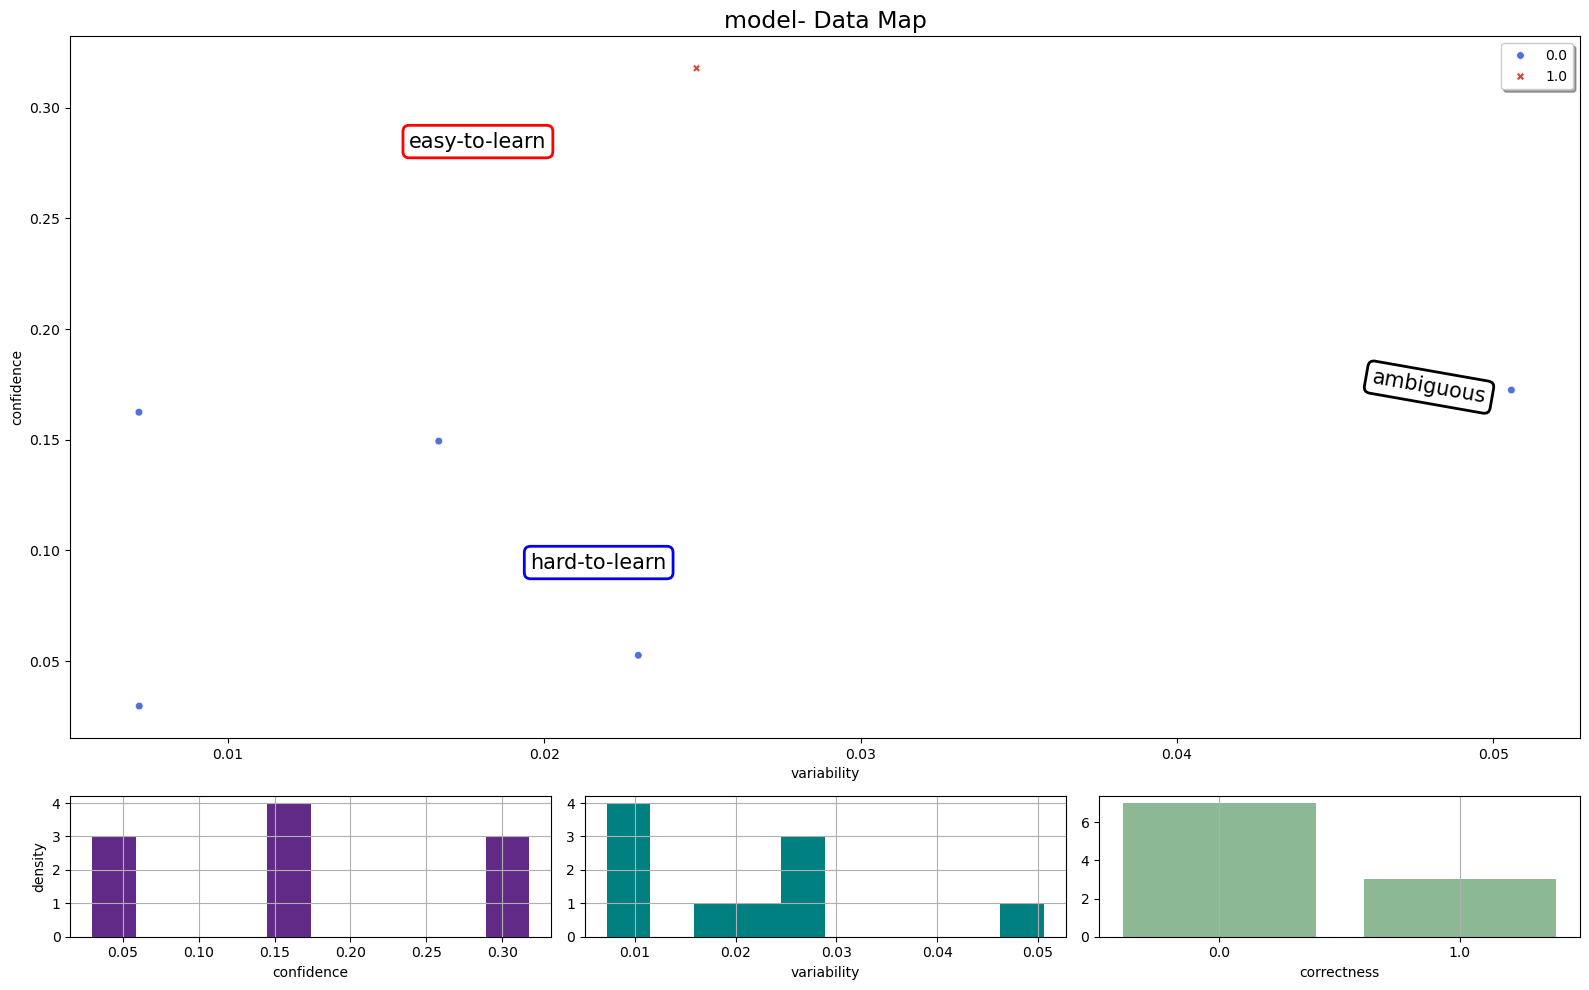

In [3]:
enginora.loop()